In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sps
import json
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

url = "http://api.openweathermap.org/data/2.5/weather?"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
# Print the city count to confirm sufficient count
len(cities)

603

In [3]:
cities_df = pd.DataFrame(data=cities)
cities_df["City"] = cities
cities_df["Country"] = countries
cities_df = cities_df.drop([0], axis = 1)
cities_df = cities_df.drop_duplicates()
cities_df

,City,Country
0,ilhabela,br
1,ancud,cl
2,cape town,za
3,hermanus,za
4,barentsburg,sj
...,...,...
598,opelousas,us
599,cordoba,ar
600,melfi,td
601,araouane,ml


In [4]:
all_cities = []
all_countries = []
lats = []
lons = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
dates = []


for index, row in cities_df.iterrows():
     
        try:
            city = row["City"]
            country = row["Country"]
            city_num = index +1
            query_url = f"{url}q={city}&{country}&appid={api_key}"
            current_weather = requests.get(query_url)
            weather_json = current_weather.json()
            
            lat = weather_json["coord"]["lat"]   
            lon = weather_json["coord"]["lon"] 
            k_temp = weather_json["main"]["temp_max"] 
            max_temp = (k_temp - 273.15) * 9/5 + 32          
            humidity = weather_json["main"]["humidity"]
            cloudiness = weather_json["clouds"]["all"]
            wind_speed = weather_json["wind"]["speed"] 
            unix_date = weather_json["dt"]
            reg_date = datetime.utcfromtimestamp(unix_date).strftime('%Y-%m-%d')
            
            lats.append(lat)
            lons.append(lon)
            max_temps.append(max_temp)
            humidities.append(humidity)
            clouds.append(cloudiness)
            wind_speeds.append(wind_speed)
            dates.append(reg_date)
            all_cities.append(city)
            all_countries.append(country)            
         
            print(f"Retrieving Results for city #{city_num} : {city}, {country}")
        except:
            print("unable to locate city. skipping...")

Retrieving Results for city #1 : ilhabela, br
Retrieving Results for city #2 : ancud, cl
Retrieving Results for city #3 : cape town, za
Retrieving Results for city #4 : hermanus, za
unable to locate city. skipping...
unable to locate city. skipping...
Retrieving Results for city #7 : qaanaaq, gl
Retrieving Results for city #8 : atuona, pf
Retrieving Results for city #9 : alepe, ci
Retrieving Results for city #10 : chokurdakh, ru
Retrieving Results for city #11 : mehamn, no
Retrieving Results for city #12 : saskylakh, ru
Retrieving Results for city #13 : volodarskiy, ru
unable to locate city. skipping...
Retrieving Results for city #15 : hasaki, jp
Retrieving Results for city #16 : nizhnevartovsk, ru
Retrieving Results for city #17 : darhan, mn
Retrieving Results for city #18 : barrow, us
Retrieving Results for city #19 : severo-kurilsk, ru
Retrieving Results for city #20 : camana, pe
Retrieving Results for city #21 : carnarvon, au
Retrieving Results for city #22 : esperance, au
Retriev

Retrieving Results for city #176 : asau, tv
Retrieving Results for city #177 : vilyuysk, ru
Retrieving Results for city #178 : comodoro rivadavia, ar
Retrieving Results for city #179 : tarakan, id
Retrieving Results for city #180 : miles city, us
unable to locate city. skipping...
Retrieving Results for city #182 : pisco, pe
Retrieving Results for city #183 : urucara, br
unable to locate city. skipping...
Retrieving Results for city #185 : williams lake, ca
Retrieving Results for city #186 : longyearbyen, sj
Retrieving Results for city #187 : pangkalanbuun, id
unable to locate city. skipping...
Retrieving Results for city #189 : teya, ru
Retrieving Results for city #190 : arlit, ne
Retrieving Results for city #191 : los llanos de aridane, es
Retrieving Results for city #192 : luau, ao
Retrieving Results for city #193 : san patricio, mx
Retrieving Results for city #194 : kodiak, us
Retrieving Results for city #195 : nelson bay, au
Retrieving Results for city #196 : shingu, jp
Retrieving

Retrieving Results for city #351 : grand gaube, mu
Retrieving Results for city #352 : la sarre, ca
Retrieving Results for city #353 : palmer, us
Retrieving Results for city #354 : san cristobal, ec
Retrieving Results for city #355 : xining, cn
Retrieving Results for city #356 : fukue, jp
Retrieving Results for city #357 : fort saint james, ca
Retrieving Results for city #358 : husavik, is
Retrieving Results for city #359 : risor, no
unable to locate city. skipping...
Retrieving Results for city #361 : yeppoon, au
Retrieving Results for city #362 : rantoul, us
unable to locate city. skipping...
unable to locate city. skipping...
Retrieving Results for city #365 : chumikan, ru
Retrieving Results for city #366 : san policarpo, ph
Retrieving Results for city #367 : amuntai, id
Retrieving Results for city #368 : komsomolskiy, ru
Retrieving Results for city #369 : la palma, pa
Retrieving Results for city #370 : la union, cl
Retrieving Results for city #371 : danielskuil, za
Retrieving Result

Retrieving Results for city #526 : yar-sale, ru
Retrieving Results for city #527 : cabedelo, br
Retrieving Results for city #528 : bac lieu, vn
Retrieving Results for city #529 : coahuayana, mx
Retrieving Results for city #530 : pangoa, pe
Retrieving Results for city #531 : viytivka, ua
Retrieving Results for city #532 : iqaluit, ca
Retrieving Results for city #533 : natal, br
unable to locate city. skipping...
Retrieving Results for city #535 : muisne, ec
Retrieving Results for city #536 : namatanai, pg
Retrieving Results for city #537 : lata, sb
Retrieving Results for city #538 : bosaso, so
Retrieving Results for city #539 : bathsheba, bb
Retrieving Results for city #540 : avera, pf
Retrieving Results for city #541 : beibei, cn
Retrieving Results for city #542 : maralal, ke
unable to locate city. skipping...
Retrieving Results for city #544 : kaili, cn
unable to locate city. skipping...
Retrieving Results for city #546 : vestmanna, fo
Retrieving Results for city #547 : tupaciguara, b

In [5]:
weather_frame = pd.DataFrame(list(zip(all_cities, all_countries, lats, lons, max_temps, humidities,clouds,wind_speeds,dates)),
               columns =["city", "country", "lat", "lng", "max_temp", "humidity", "cloudiness", "wind_speed", "date"])
weather_frame

,city,country,lat,lng,max_temp,humidity,cloudiness,wind_speed,date
0,ilhabela,br,-23.78,-45.36,70.502,74,36,1.43,2020-08-09
1,ancud,cl,-41.87,-73.82,46.400,70,75,5.70,2020-08-09
2,cape town,za,-33.93,18.42,57.992,87,40,3.10,2020-08-09
3,hermanus,za,-34.42,19.23,57.992,74,46,3.13,2020-08-09
4,qaanaaq,gl,77.48,-69.36,41.450,65,0,0.63,2020-08-09
...,...,...,...,...,...,...,...,...,...
541,tabou,ci,4.42,-7.35,75.632,79,2,2.91,2020-08-09
542,opelousas,us,30.53,-92.08,80.996,88,40,1.50,2020-08-09
543,cordoba,ar,-31.41,-64.18,84.200,26,0,6.20,2020-08-09
544,melfi,td,41.00,15.65,80.600,54,5,2.10,2020-08-09


In [6]:
weather_frame.to_csv("output_data/weather_csv", index=None)

In [7]:
weather_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        546 non-null    object 
 1   country     546 non-null    object 
 2   lat         546 non-null    float64
 3   lng         546 non-null    float64
 4   max_temp    546 non-null    float64
 5   humidity    546 non-null    int64  
 6   cloudiness  546 non-null    int64  
 7   wind_speed  546 non-null    float64
 8   date        546 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 38.5+ KB


In [8]:
weather_frame["humidity"].sort_values(ascending=False)

226    100
78     100
471    100
115    100
526    100
      ... 
414     11
497     10
273      9
140      9
364      3
Name: humidity, Length: 546, dtype: int64

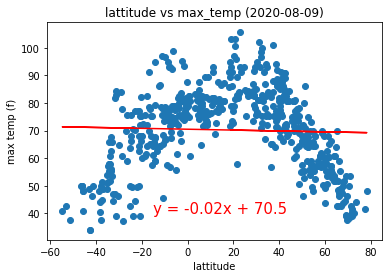

In [9]:
the_lats = weather_frame["lat"]
date = weather_frame["date"][0]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(the_lats, max_temps)
regress_values = the_lats * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.scatter(the_lats, max_temps)
plt.plot(lats, regress_values, "r-")
plt.annotate(line_eq,(-15, 40),fontsize=15,color="red")
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title(f"lattitude vs max_temp ({date})")
plt.savefig("output_data/lattitude_vs_max_temp.png")

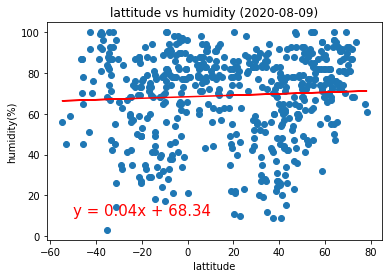

In [10]:
(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(lats, humidities)
regress_values = the_lats * slope + intercept

plt.scatter(lats, humidities)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("humidity(%)")
plt.title(f"lattitude vs humidity ({date})")
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-50, 10),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_humidity.png")

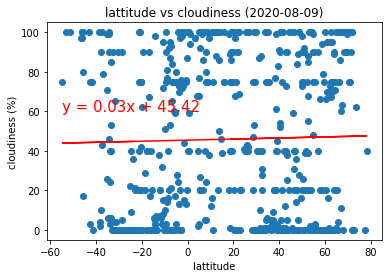

In [11]:
(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(the_lats, clouds)
regress_values = the_lats * slope + intercept

plt.scatter(lats, clouds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("cloudiness (%)")
plt.title(f"lattitude vs cloudiness ({date})")
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_cloudiness.png")

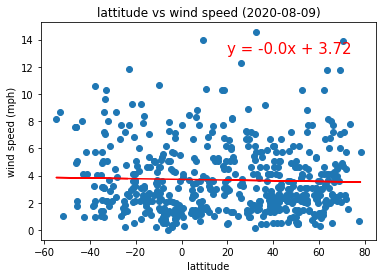

In [12]:
(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(the_lats, wind_speeds)
regress_values = the_lats * slope + intercept

plt.scatter(lats, wind_speeds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("wind speed (mph)")
plt.title(f"lattitude vs wind speed ({date})")
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(20,13),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_wind_speed.png")

In [13]:
northern_df = weather_frame[weather_frame["lat"] > 0]
northern_df

,city,country,lat,lng,max_temp,humidity,cloudiness,wind_speed,date
4,qaanaaq,gl,77.48,-69.36,41.450,65,0,0.63,2020-08-09
6,alepe,ci,5.50,-3.66,77.000,88,20,2.60,2020-08-09
7,chokurdakh,ru,70.63,147.92,38.354,81,100,4.72,2020-08-09
8,mehamn,no,71.04,27.85,53.600,81,75,7.20,2020-08-09
9,saskylakh,ru,71.92,114.08,41.540,68,100,2.28,2020-08-09
...,...,...,...,...,...,...,...,...,...
540,powell river,ca,49.85,-124.54,68.000,72,20,2.60,2020-08-09
541,tabou,ci,4.42,-7.35,75.632,79,2,2.91,2020-08-09
542,opelousas,us,30.53,-92.08,80.996,88,40,1.50,2020-08-09
544,melfi,td,41.00,15.65,80.600,54,5,2.10,2020-08-09


In [14]:
southern_df = weather_frame[weather_frame["lat"] < 0]
southern_df

,city,country,lat,lng,max_temp,humidity,cloudiness,wind_speed,date
0,ilhabela,br,-23.78,-45.36,70.502,74,36,1.43,2020-08-09
1,ancud,cl,-41.87,-73.82,46.400,70,75,5.70,2020-08-09
2,cape town,za,-33.93,18.42,57.992,87,40,3.10,2020-08-09
3,hermanus,za,-34.42,19.23,57.992,74,46,3.13,2020-08-09
5,atuona,pf,-9.80,-139.03,78.584,70,51,10.63,2020-08-09
...,...,...,...,...,...,...,...,...,...
517,neiafu,to,-18.65,-173.98,60.800,93,20,6.02,2020-08-09
524,taltal,cl,-25.40,-70.48,63.590,59,22,1.63,2020-08-09
525,pauini,br,-7.71,-66.98,93.056,38,95,0.84,2020-08-09
537,cobija,bo,-11.03,-68.77,96.962,24,32,0.20,2020-08-09


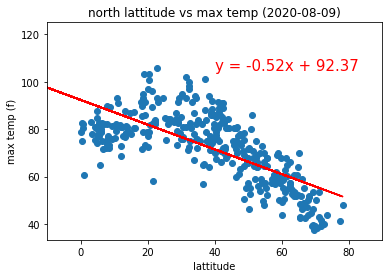

In [15]:
north_lats = northern_df["lat"]
north_temps = northern_df["max_temp"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_temps)
regress_values = the_lats * slope + intercept

plt.scatter(north_lats, north_temps)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title(f"north lattitude vs max temp ({date})")
plt.xlim(-10, 90)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(40,105),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_north_temp.png")

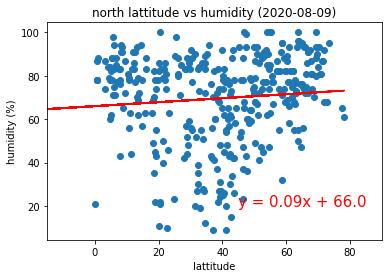

In [16]:
north_humidities = northern_df["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_humidities)
regress_values = the_lats * slope + intercept

plt.scatter(north_lats, north_humidities)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("humidity (%)")
plt.title(f"north lattitude vs humidity ({date})")
plt.xlim(-15, 90)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(45, 20),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_north_humidity.png")

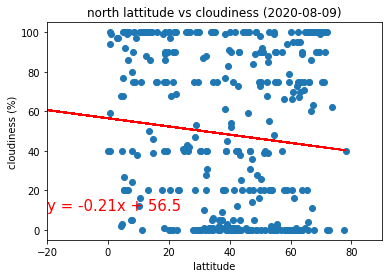

In [17]:
north_clouds = northern_df["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_clouds)
regress_values = the_lats * slope + intercept
plt.scatter(north_lats, north_clouds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("cloudiness (%)")
plt.title(f"north lattitude vs cloudiness ({date})")
plt.xlim(-20, 90)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_noth_cloudiness.png")

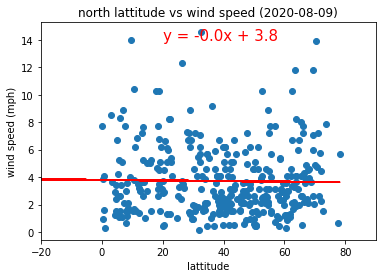

In [18]:
north_speeds = northern_df["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_speeds)
regress_values = the_lats * slope + intercept
plt.scatter(north_lats, north_speeds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("wind speed (mph)")
plt.title(f"north lattitude vs wind speed ({date})")
plt.xlim(-20, 90)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(20,14),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_north_speed.png")

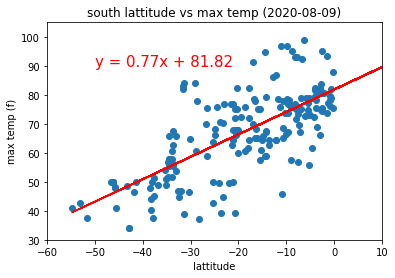

In [19]:
south_lats = southern_df["lat"]
south_temps = southern_df["max_temp"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_temps)
regress_values = the_lats * slope + intercept

plt.scatter(south_lats, south_temps)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title(f"south lattitude vs max temp ({date})")
plt.xlim(-60,10)
plt.ylim(30,105)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_south_temp.png")

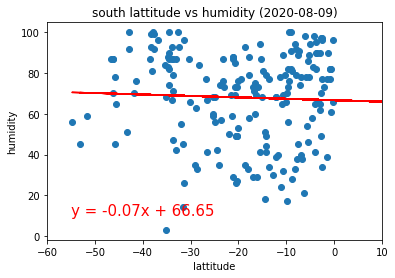

In [20]:
south_humidities = southern_df["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_humidities)
regress_values = the_lats * slope + intercept

plt.scatter(south_lats, south_humidities)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("humidity")
plt.title(f"south lattitude vs humidity ({date})")
plt.xlim(-60,10)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_south_humidity.png")

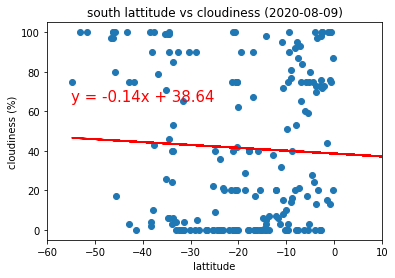

In [21]:
south_clouds = southern_df["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_clouds)
regress_values = the_lats * slope + intercept

plt.scatter(south_lats, south_clouds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("cloudiness (%)")
plt.title(f"south lattitude vs cloudiness ({date})")
plt.xlim(-60,10)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-55,65),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_south_clouds.png")

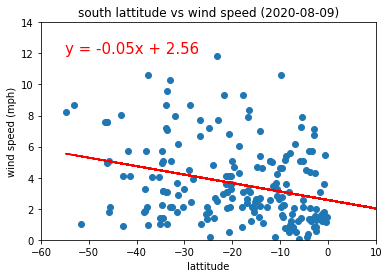

In [22]:
south_speeds = southern_df["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_speeds)
regress_values = the_lats * slope + intercept

plt.scatter(south_lats, south_speeds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("wind speed (mph)")
plt.title(f"south lattitude vs wind speed ({date})")
plt.xlim(-60,10)
plt.ylim(0,14)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-55,12),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_south_speeds.png")